# Quick Start

## A Simple Example

`udiff` is an automatic differentiation library with `uarray`/`unumpy`. Getting started is easy.

There is a simple example:

In [1]:
# import the required packages
import uarray as ua
import unumpy as np
import numpy as onp
import udiff
from unumpy import numpy_backend

import matplotlib.pyplot as plt

In [2]:
with ua.set_backend(udiff.DiffArrayBackend(numpy_backend), coerce=True):
    x1 = np.array([2])
    x2 = np.array([5])
    y = np.log(x1) + x1 * x2 - np.sin(x2)
    x1_diff = y.to(x1)
    print(onp.allclose(x1_diff.value, [5.5]))

True


## Vector-Jacobian products (VJPs)
If you have used pytorch, you will find that if `y` is a tensor instead of a scalar, you will be asked to pass a  `grad_variables` in `y.backward()`. And the derivative result `x.grad` has the same shape as `x`. Where is the Jacobian matrix?

The reason is that deep learning frameworks such as Tensorflow and PyTorch prohibit the derivatives with tensor by tensor, but only retain scalar by tensor. When we call `y.backward()` and enter a `grad_variables` `v`. In fact, it actually converts y into a weighted sum `l = torch.sum(y * v)`, where `l` is a scalar, and then the gradient of `x.grad` is naturally of the same shape as `x`. 

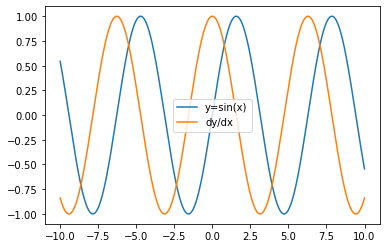

In [3]:
with ua.set_backend(udiff.DiffArrayBackend(numpy_backend), coerce=True):
    x = np.asarray(onp.linspace(-10, 10, num=1000))
    
    y = np.sin(x)
    plt.plot(onp.linspace(-10, 10, num=1000), y.value, label='y=sin(x)')
    plt.plot(onp.linspace(-10, 10, num=1000), y.to(x).value, label='dy/dx')
    plt.legend()

## Derivative of Higher Order

You can get the higher derivative of `x` by calling `to` one more time. 

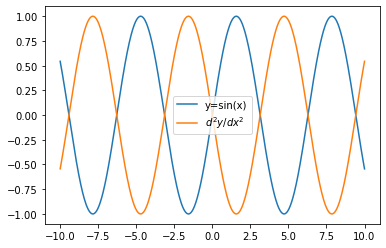

In [4]:
with ua.set_backend(udiff.DiffArrayBackend(numpy_backend), coerce=True):
    plt.plot(onp.linspace(-10, 10, num=1000), y.value, label='y=sin(x)')
    plt.plot(onp.linspace(-10, 10, num=1000), y.to(x).to(x).value, label=r'$d^2y/dx^2$')
    plt.legend()

## Jacobian Matrix

In addition to calculating `vjp` or `jvp`, we also provide an API for calculating the Jacobian matrix for users with special needs.

In order to get Jacobian Matrix, we derive `y` for each element in `x`.

In [5]:
with ua.set_backend(udiff.DiffArrayBackend(numpy_backend), coerce=True):
        x1 = np.asarray(onp.arange(2).reshape(1, 2, 1))
        x2 = np.asarray(onp.arange(2).reshape(1, 1, 2))
        y = np.matmul(x1, x2)
        print("x1's jacobian matrix: \n", y.to(x1, jacobian=True))
        print("\nx2's jacobian matrix: \n", y.to(x2, jacobian=True))

x1's jacobian matrix: 
 <VJPDiffArray, id=UUID('348785de-5fa5-489d-9a3e-9f7f9f9a1440'), value=
[[[[[[0]
     [0]]]


   [[[1]
     [0]]]]



  [[[[0]
     [0]]]


   [[[0]
     [1]]]]]]
>

x2's jacobian matrix: 
 <VJPDiffArray, id=UUID('ade199a8-5270-475d-979b-e626b8b839f9'), value=
[[[[[[0 0]]]


   [[[0 0]]]]



  [[[[1 0]]]


   [[[0 1]]]]]]
>
